# Reticulate

### Pacote que permite a integração do R e do Python no mesmo ambiente, oference uma interface entre os dois.

In [2]:
# Instala o Reticulate em uma localização específica
install.packages("reticulate")

# Carrega o pacote para o ambiente, considerando que ele já foi instalado acima
library(reticulate)

Installing package into ‘/home/davirnas/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)



In [3]:
# Exibe informações sobre a configuração atual do Python no ambiente R
py_config()

python:         /home/davirnas/.cache/R/reticulate/uv/cache/archive-v0/cP4II99lTMYuhZg4XQTT5/bin/python3
libpython:      /home/davirnas/.cache/R/reticulate/uv/python/cpython-3.11.12-linux-x86_64-gnu/lib/libpython3.11.so
pythonhome:     /home/davirnas/.cache/R/reticulate/uv/cache/archive-v0/cP4II99lTMYuhZg4XQTT5:/home/davirnas/.cache/R/reticulate/uv/cache/archive-v0/cP4II99lTMYuhZg4XQTT5
virtualenv:     /home/davirnas/.cache/R/reticulate/uv/cache/archive-v0/cP4II99lTMYuhZg4XQTT5/bin/activate_this.py
version:        3.11.12 (main, Apr  9 2025, 04:04:00) [Clang 20.1.0 ]
numpy:          /home/davirnas/.cache/R/reticulate/uv/cache/archive-v0/cP4II99lTMYuhZg4XQTT5/lib/python3.11/site-packages/numpy
numpy_version:  2.2.5

NOTE: Python version was forced by py_require()

In [4]:
# garante que o pacote pandas esteja disponível no ambiente Python que está sendo utilizado pelo reticulate
py_require("pandas")

In [5]:
pd <- import("pandas")

In [6]:
df_original <- pd$read_csv("Placement_Data_Full_Class.csv")

In [7]:
# Criar Cópia
df_no_salary <- df_original

In [8]:
# Remoção da ColunaSalary no dataframe
# 1- Verificar se coluna existe no dataframe

# Definindo o nome da coluna em uma variável
coluna <- "salary"

# Verificar se a coluna existe no DataFrame
if (coluna %in% colnames(df_no_salary)) {
    # Usando paste para concatenar e imprimir a mensagem
    print(paste("A coluna", coluna, "existe."))
    
    # Remover a coluna do DataFrame
    df_no_salary <- df_no_salary[, !colnames(df_no_salary) %in% coluna]
    print(paste("A coluna", coluna, "foi removida."))
} else {
    # Usando paste para concatenar e imprimir a mensagem
    print(paste("A coluna", coluna, "não existe."))
}

[1] "A coluna salary existe."
[1] "A coluna salary foi removida."


### Análise Exploratória de Dados (EDA)

#### Converter Dataframe de Python para R

In [9]:
df_original_r <- py_to_r(df_original)

#### Mostra as 6 primeiras linhas (Primeiras Linhas)

In [10]:
head(df_original_r)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NaN


#### Ver Estrtutura do Dataframe | Mostra os tipos de variáveis, nomes das colunas e alguns valores iniciais.


In [11]:
str(df_original_r)

'data.frame':	215 obs. of  15 variables:
 $ sl_no         : num  1 2 3 4 5 6 7 8 9 10 ...
 $ gender        : chr  "M" "M" "M" "M" ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : chr  "Others" "Central" "Central" "Central" ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : chr  "Others" "Others" "Central" "Central" ...
 $ hsc_s         : chr  "Commerce" "Science" "Arts" "Science" ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : chr  "Sci&Tech" "Sci&Tech" "Comm&Mgmt" "Sci&Tech" ...
 $ workex        : chr  "No" "Yes" "No" "No" ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: chr  "Mkt&HR" "Mkt&Fin" "Mkt&Fin" "Mkt&HR" ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : chr  "Placed" "Placed" "Placed" "Not Placed" ...
 $ salary        : num  270000 200000 250000 NaN 425000 NaN NaN 252000 231000 NaN ...
 - attr(*, "pandas.index")=RangeIndex(start=0, stop=215, step=1)


#### Sumário Estatístico

In [12]:
summary(df_original_r)

     sl_no          gender              ssc_p          ssc_b          
 Min.   :  1.0   Length:215         Min.   :40.89   Length:215        
 1st Qu.: 54.5   Class :character   1st Qu.:60.60   Class :character  
 Median :108.0   Mode  :character   Median :67.00   Mode  :character  
 Mean   :108.0                      Mean   :67.30                     
 3rd Qu.:161.5                      3rd Qu.:75.70                     
 Max.   :215.0                      Max.   :89.40                     
                                                                      
     hsc_p          hsc_b              hsc_s              degree_p    
 Min.   :37.00   Length:215         Length:215         Min.   :50.00  
 1st Qu.:60.90   Class :character   Class :character   1st Qu.:61.00  
 Median :65.00   Mode  :character   Mode  :character   Median :66.00  
 Mean   :66.33                                         Mean   :66.37  
 3rd Qu.:73.00                                         3rd Qu.:72.00  
 Max. 

#### Verificar valores ausentes (NA) | Conta quantos NAs tem em cada coluna

In [13]:
colSums(is.na(df_original_r))

sl_no         gender          ssc_p          ssc_b          hsc_p 
             0              0              0              0              0 
         hsc_b          hsc_s       degree_p       degree_t         workex 
             0              0              0              0              0 
       etest_p specialisation          mba_p         status         salary 
             0              0              0              0             67

####  Verificar classes de cada coluna

In [14]:
sapply(df_original_r, class)

sl_no         gender          ssc_p          ssc_b          hsc_p 
     "numeric"    "character"      "numeric"    "character"      "numeric" 
         hsc_b          hsc_s       degree_p       degree_t         workex 
   "character"    "character"      "numeric"    "character"    "character" 
       etest_p specialisation          mba_p         status         salary 
     "numeric"    "character"      "numeric"    "character"      "numeric"

#### Contagem de valores únicos (para variáveis categóricas)

In [15]:
lapply(df_original_r, function(col) length(unique(col)))

$sl_no
[1] 215

$gender
[1] 2

$ssc_p
[1] 103

$ssc_b
[1] 2

$hsc_p
[1] 97

$hsc_b
[1] 2

$hsc_s
[1] 3

$degree_p
[1] 89

$degree_t
[1] 3

$workex
[1] 2

$etest_p
[1] 100

$specialisation
[1] 2

$mba_p
[1] 205

$status
[1] 2

$salary
[1] 46

#### Visualizações rápidas com ggplot2 (se for usar gráficos)

Installing package into ‘/home/davirnas/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)



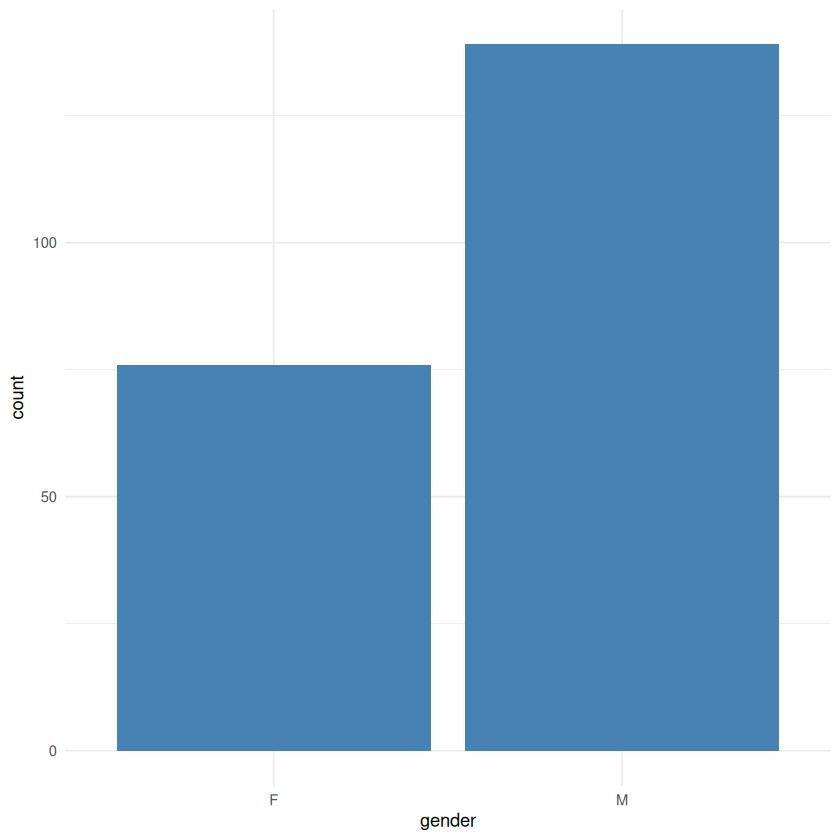

In [16]:
install.packages("ggplot2")
library(ggplot2)

# Histograma de uma variável numérica (ex: 'a')
ggplot(df_original_r, aes(x = gender)) +
  geom_bar(fill = "steelblue") +
  theme_minimal()

# geom_bar() : Cria um gráfico de barras para variáveis categóricas no eixo X
# theme_minimal : Aplica um tema visual limpo e simples ao gráfico.

### Aplicar Label Encoder : Técnica de Codificação de Atributos Categóricos

In [ ]:
py_require("scikit-learn")

In [ ]:
sklearn <- import("sklearn.preprocessing")

In [ ]:
le <- sklearn$LabelEncoder()

#### Colunas Categóricas

In [ ]:
categorical_columns <- c("gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status")

#### Aplicar LabelEncoder em cada coluna

In [ ]:
for (col in categorical_columns) {
  df_no_salary[[col]] <- le$fit_transform(df_no_salary[[col]])
}

In [ ]:
head(df_no_salary)

#### Selecione um dos modelos de classificação aprendidos até agora na disciplina (Naive Bayes ou Regressão Logística) e treine-o com df_no_salary. Seu objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado]) de cada indivíduo

In [ ]:
# Converte para um dataframe
df_no_salary_r <- as.data.frame(df_no_salary)

In [ ]:
# Dividindo em treino e teste (80% treino, 20% teste) de forma correta
set.seed(42)
index <- sample(1:nrow(df_no_salary_r), size = 0.8 * nrow(df_no_salary_r))
train_data <- df_no_salary_r[index, ]
test_data <- df_no_salary_r[-index, ]

In [ ]:
# Treinando o modelo de Regressão Logística
logistic_model <- glm(status ~ ., data = train_data, family = "binomial")

In [ ]:
# Fazendo previsões
test_data$pred_prob <- predict(logistic_model, newdata = test_data[, -which(names(test_data) == "status")], type = "response")
test_data$pred_class <- ifelse(test_data$pred_prob > 0.5, 1, 0)

In [ ]:
# Convertendo os rótulos em fator
test_data$status <- as.factor(test_data$status)
test_data$pred_class <- as.factor(test_data$pred_class)

In [ ]:
# Avaliando o Modelo - Métricas
library(caret)
metrics <- confusionMatrix(test_data$pred_class, test_data$status)
print(metrics)

In [ ]:
df_no_status <- df_original

In [ ]:
df_no_status

### 10 - A partir de df_original, crie o Data Frame df_no_status agora removendo a coluna status

In [ ]:
df_no_status <- df_original

In [ ]:
# Remoção da Coluna Status no dataframe
# 1- Verificar se coluna existe no dataframe

# Definindo o nome da coluna em uma variável
coluna <- "status"

# Verificar se a coluna existe no DataFrame
if (coluna %in% colnames(df_no_status)) {
    # Usando paste para concatenar e imprimir a mensagem
    print(paste("A coluna", coluna, "existe."))
    
    # Remover a coluna do DataFrame
    df_no_status <- df_no_status[, !colnames(df_no_status) %in% coluna]
    print(paste("A coluna", coluna, "foi removida."))
} else {
    # Usando paste para concatenar e imprimir a mensagem
    print(paste("A coluna", coluna, "não existe."))
}

In [ ]:
head(df_no_status)

In [ ]:
categorical_columns2 <- c("gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation")

In [ ]:
for (col in categorical_columns2) {
  df_no_status[[col]] <- le$fit_transform(df_no_status[[col]])
}

In [ ]:
head(df_no_status)

### 11 - Treine um modelo de regressão linear múltipla e preveja os salários (salary) das amostras que não possuem essa informação em df_no_status

In [ ]:
preprocessing <- import("sklearn.preprocessing")
linear_model <- import("sklearn.linear_model")

df_no_status <- df_original[, !(names(df_original) %in% "status")]

# Etapa 1: Separar os dados com e sem salário
df_train <- df_no_status[!is.na(df_no_status$salary), ]
df_test  <- df_no_status[is.na(df_no_status$salary), ]

In [ ]:
head(df_test)

In [ ]:
# Etapa 2: Remover a coluna status, se necessário
# df_train <- df_train[, !colnames(df_train) %in% "status"]
# df_test  <- df_test[, !colnames(df_test) %in% "status"]
# Colunas categóricas
categorical_columns3 <- c("gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation")

# Aplicar LabelEncoder a cada coluna, guardando os encoders
encoders <- list()
for (col in categorical_columns3) {
  le <- preprocessing$LabelEncoder()
  df_train[[col]] <- le$fit_transform(df_train[[col]])
  df_test[[col]] <- le$transform(df_test[[col]])  # aplicar mesma codificação no teste
  encoders[[col]] <- le  # salvar o encoder, caso queira usar depois
}

In [ ]:
# Remover colunas não numéricas ou desnecessárias
# (ex: "nome" se existir — aqui assumimos que todas as colunas fora 'salary' são preditoras)
feature_columns <- setdiff(colnames(df_train), "salary")

In [ ]:
# Colunas categóricas
categorical_columns3 <- c("gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation")

# Aplicar LabelEncoder a cada coluna, guardando os encoders
for (col in categorical_columns3) {
  le <- preprocessing$LabelEncoder()
  df_train[[col]] <- as.numeric(le$fit_transform(df_train[[col]]))
  df_test[[col]]  <- as.numeric(le$transform(df_test[[col]]))
  encoders[[col]] <- le
}


In [ ]:
# Treinar modelo de regressão linear
model <- linear_model$LinearRegression()
model$fit(df_train[, feature_columns], df_train$salary)

In [ ]:
# Prever salários para o conjunto de teste
predicted_salaries <- model$predict(df_test[, feature_columns])

# Adicionar a previsão ao df_test
df_test$salary <- predicted_salaries

# Agora df_test contém os salários previstos
head(df_test)

### 12 - Para as amostras que não possuem o atributo salary preenchidos em df_no_status, inclua o valor previsto pelo modelo de regressão linear múltipla

In [ ]:
missing_salary_idx <- which(is.na(df_no_status$salary))

if (length(missing_salary_idx) == length(predicted_salaries)) {
  df_no_status$salary[missing_salary_idx] <- predicted_salaries
} else {
  print("Erro: número de salários previstos não bate com o número de salários ausentes.")
}

In [ ]:
head(df_no_status)